<a href="https://colab.research.google.com/github/manikanta741/Machine-Learning/blob/main/imgprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!apt-get install unrar -y
!unrar x "/content/dogs-vs-cats.rar" "/content/dogs-vs-cats/"
!ls "/content/dogs-vs-cats/"
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
dataset_dir = "/content/dogs-vs-cats/"
IMG_SIZE = (150, 150)
BATCH_SIZE = 32
train_datagen = ImageDataGenerator(
rescale=1.0/255,
rotation_range=20,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
dataset_dir,
target_size=IMG_SIZE,
batch_size=BATCH_SIZE,
class_mode='binary',
subset='training'
)
val_generator = train_datagen.flow_from_directory(
    dataset_dir,
target_size=IMG_SIZE,
batch_size=BATCH_SIZE,
class_mode='binary',
subset='validation'
)


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# Build the CNN Model
model = Sequential([
Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3), strides=(1,1), padding="same"),
MaxPooling2D((2,2), strides=(2,2)),
                     Conv2D(64, (3,3), activation='relu', padding="same"),
MaxPooling2D((2,2), strides=(2,2)),
Conv2D(128, (3,3), activation='relu', padding="same"),
MaxPooling2D((2,2), strides=(2,2)),
Flatten(),
Dense(512, activation='relu'),
Dropout(0.5),
Dense(1, activation='sigmoid')
])

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1).
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.

UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/dogs-vs-cats.rar


Would you like to replace the existing file /content/dogs-vs-cats/dogs-vs-cats/cats/240_F_97589769_t45CqXyzjz0KXwoBZT9PRaWGHRk5hQqQ.jpg
 24702 bytes, modified on 2024-12-03 06:24
with a new one
 24702 bytes, modified on 2024-12-03 06:24

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit 
User break

User break
dogs-vs-cats
Found 4 images belonging to 1 classes.
Found 1 images belonging to 1 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()
history = model.fit(
train_generator,
validation_data=val_generator,
epochs=10
)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 150, 150, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 37, 37, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 41472)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      21,234,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,327,937 (81.36 MB)

 Trainable params: 21,327,937 (81.36 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.0000e+00 - loss: 0.7913 - val_accuracy: 1.0000 - val_loss: 4.7868e-09
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 665ms/step - accuracy: 1.0000 - loss: 9.8437e-05 - val_accuracy: 1.0000 - val_loss: 1.3650e-15
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step - accuracy: 1.0000 - loss: 5.5761e-10 - val_accuracy: 1.0000 - val_loss: 3.9766e-23
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step - accuracy: 1.0000 - loss: 9.1340e-11 - val_accuracy: 1.0000 - val_loss: 6.2187e-29
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step - accuracy: 1.0000 - loss: 4.0558e-11 - val_accuracy: 1.0000 - val_loss: 4.0162e-34
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 629ms/step - accuracy: 1.0000 - loss: 7.3328e-18 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step - accuracy: 1.0000 - loss: 1.1902e-22 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step - accuracy: 1.0

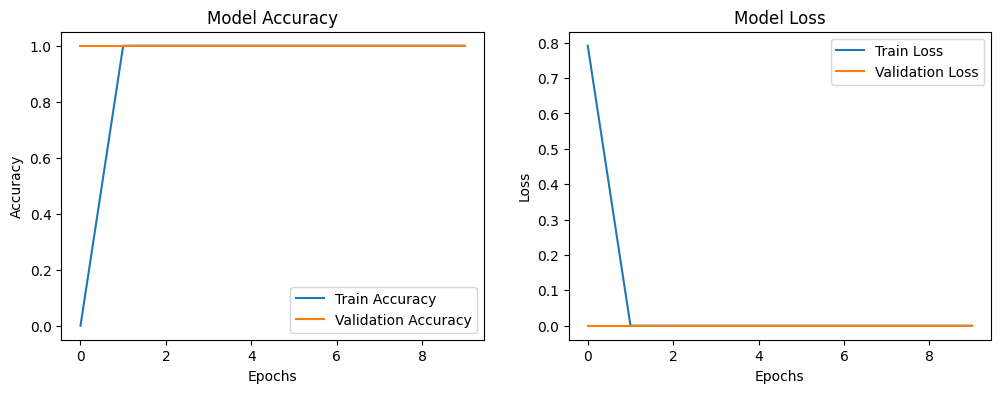

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
The image is a Cat (1.00)


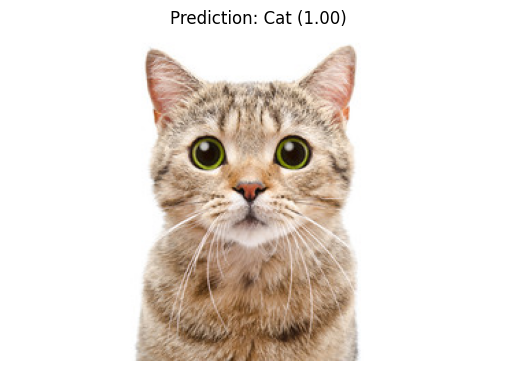

In [13]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt # Import matplotlib.pyplot
def predict_image(img_path):
  img = image.load_img(img_path, target_size=(150, 150))
  img_array = image.img_to_array(img) / 255.0
  img_array = np.expand_dims(img_array, axis=0)
  prediction = model.predict(img_array)[0][0]
  if prediction > 0.5:
    label = "Dog"
    confidence = prediction
    print(f"The image is a Dog ({prediction:.2f})")
  else:
    label = "Cat"
    confidence = 1 - prediction
    print(f"The image is a Cat ({1 - prediction:.2f})")
  plt.imshow(image.load_img(img_path))
  plt.axis("off")
  plt.title(f"Prediction: {label} ({confidence:.2f})")
  plt.show()
predict_image("/content/dogs-vs-cats/dogs-vs-cats/cats/240_F_97589769_t45CqXyzjz0KXwoBZT9PRaWGHRk5hQqQ.jpg")